<a href="https://colab.research.google.com/github/nakatoconstance/nakatoconstance/blob/main/Yet_another_copy_of_Neural_Network_Models_October_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.metrics import mean_squared_error, r2_score# importing package for model evaluation
uploaded=files.upload()#C:\Users\USER\OneDrive\Desktop\nakato research\Objective 1 Content\Dataset building\DATASET FOR MODELING HHV\HHV_DATASET_DRY.csv

Saving HHV_DATASET_DRY_final_2.csv to HHV_DATASET_DRY_final_2 (3).csv


In [79]:
data = pd.read_csv('HHV_DATASET_DRY_final_2.csv', encoding='latin-1') # or 'ISO-8859-1', 'cp1252'
data.head()

Unnamed: 0             Biomass   ASH     VM     FC     C    H     O    N  \
0   1.              Alfalfa Stem  5.27  78.92  15.81 47.17 6.00 38.19 2.68   
1   2.          alfalfa (lucern)  9.40   73.9   16.7 45.00 6.00 36.90 2.50   
2   3.        alfalfa seed straw  7.25   72.6  20.15 46.76 5.40 40.72 1.00   
3   4.          cotton gin trash 17.60   67.3   15.1 39.59 5.26 36.38 2.09   
4   5.          cotton gin waste  9.36  82.16   8.48 49.03 4.71 35.08 1.45   

     S   Cel   Hem   Lig  HHV (MJ/kg) Source  
0 0.20   NaN   NaN   NaN        18.67    [1]  
1 2.00   NaN   NaN   NaN        18.60    [2]  
2 0.02   NaN   NaN   NaN        18.45    [2]  
3  NaN 20.00  9.10  17.6        16.42    [2]  
4 0.36 77.80 16.00     0        16.27    [2]

In [80]:
#drop unnamed columns
#data = data.drop(columns=['Unnamed: 14'])
#drop unnamed column
data = data.drop(columns=['Unnamed: 0'])
#drop biomass with NAN
#data = data.dropna(subset=['Biomass'])

In [81]:
#data.head()
#count missing values
data.isnull().sum()
#compute percentage
data.isnull().sum()/len(data)*100
#display recouds with empty source column
#DISPLAY SOURCE WITH nan
#print(data['Source'].isna())

Biomass        2.25
ASH            2.62
VM             8.61
FC             8.61
C              3.00
H              5.62
O              5.62
N              5.99
S             25.84
Cel           21.72
Hem           21.72
Lig           20.22
HHV (MJ/kg)    8.61
Source         3.00
dtype: float64

In [84]:
# Assuming 'data' is your DataFrame
cols_to_convert = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

Explanation:

sns.jointplot(): This function creates the joint probability distribution plot.
kind='kde': We use kind='kde' to generate a kernel density estimation plot, which shows the distribution of the data as smooth contours. This is better for visualizing outliers compared to a scatter plot or a hexbin plot.
Outlier Visualization: The isolated contours in the plot will indicate the presence of outliers. These are points that are far away from the main concentration of the data.

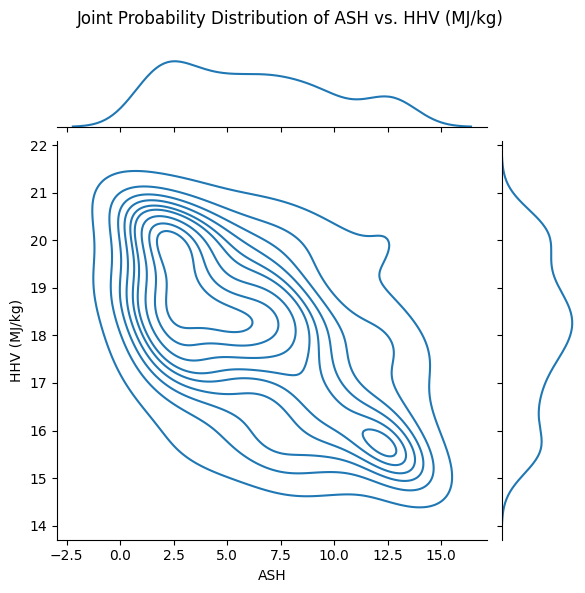

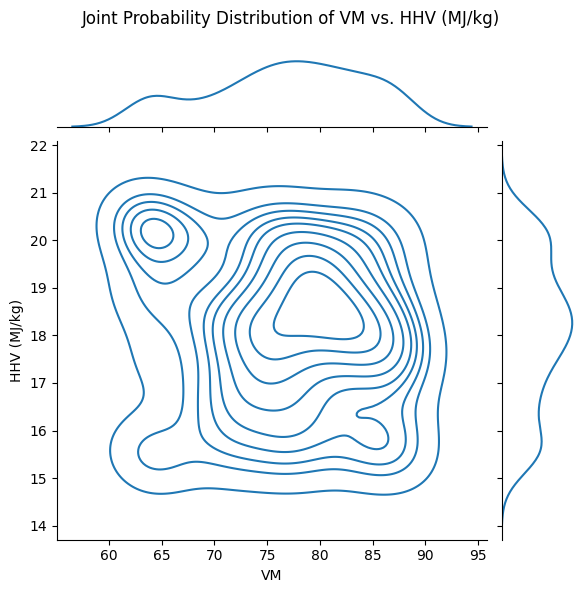

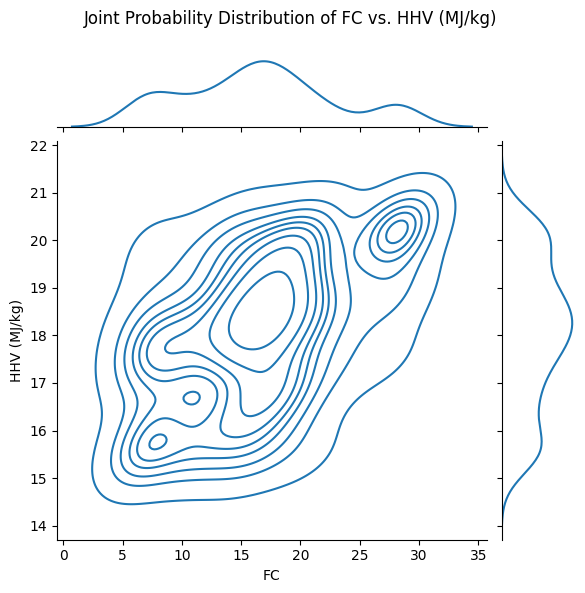

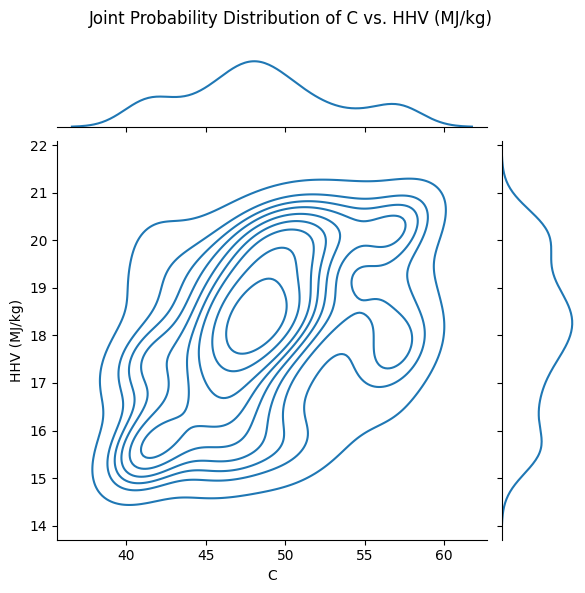

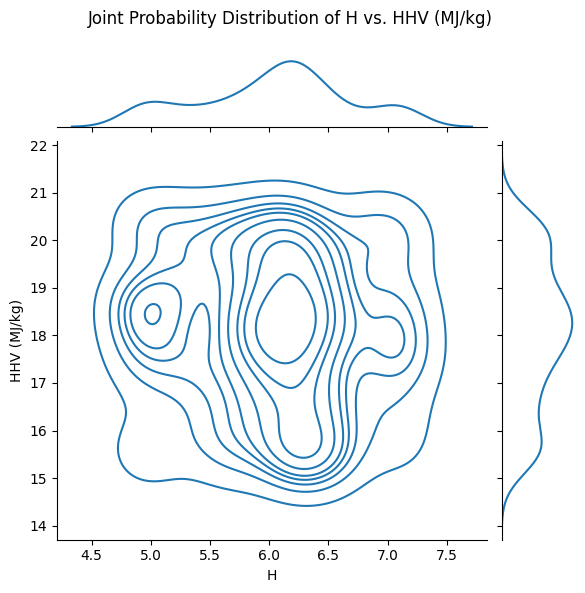

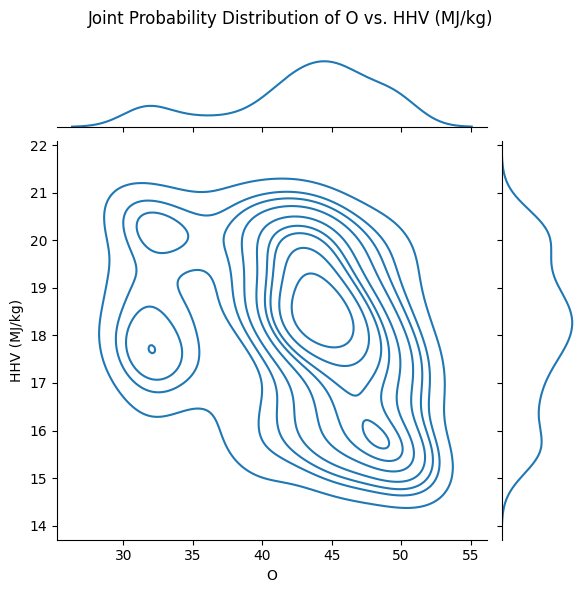

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

#columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O']

for column in columns_to_plot:
    g = sns.jointplot(x=column, y='HHV (MJ/kg)', data=data, kind='kde')
    g.fig.suptitle(f'Joint Probability Distribution of {column} vs. HHV (MJ/kg)')
    plt.subplots_adjust(top=0.9)  # Adjust the top margin to prevent title cutoff
    plt.show()

In [ ]:
#

In [86]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

columns_to_impute = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Create KNN imputer object
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed = imputer.fit_transform(data[columns_to_impute])

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=columns_to_impute, index=data.index)

# Normalize to ensure ASH + VM + FC = 100
data_imputed[['ASH', 'VM', 'FC']] = data_imputed[['ASH', 'VM', 'FC']].div(data_imputed[['ASH', 'VM', 'FC']].sum(axis=1), axis=0) * 100

# Normalize to ensure S + H + C + O + N = 100
data_imputed[['S', 'H', 'C', 'O', 'N']] = data_imputed[['S', 'H', 'C', 'O', 'N']].div(data_imputed[['S', 'H', 'C', 'O', 'N']].sum(axis=1), axis=0) * 100

# Replace original columns with imputed and adjusted values
data[columns_to_impute] = data_imputed[columns_to_impute]

# Now 'data' has missing values filled using KNN imputation and sums adjusted to 100


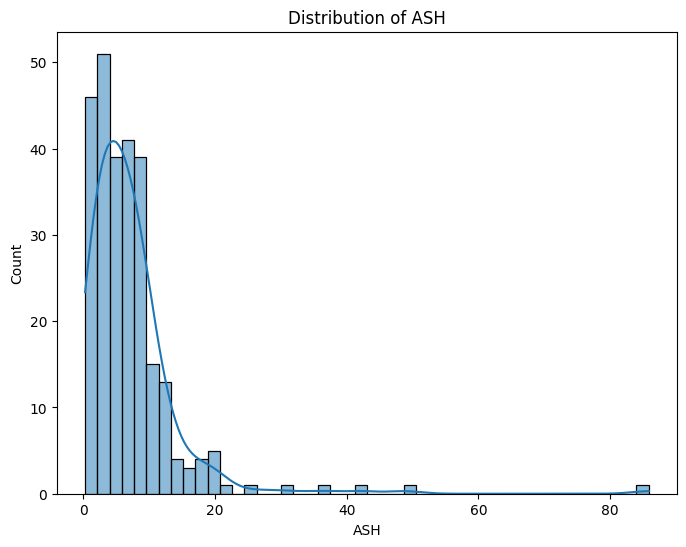

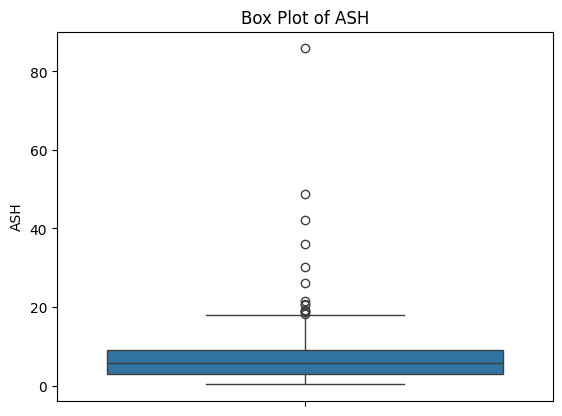

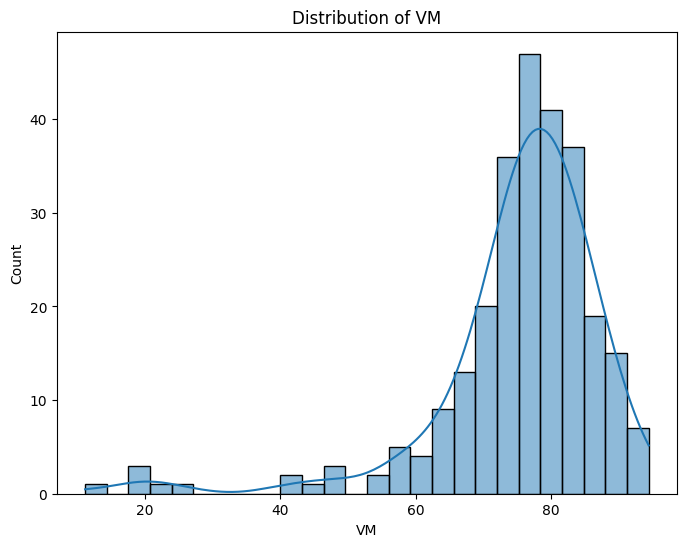

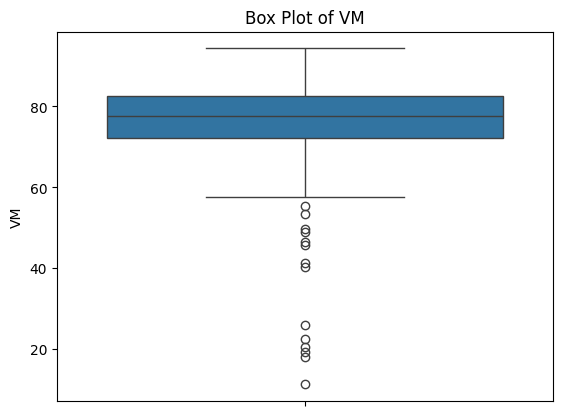

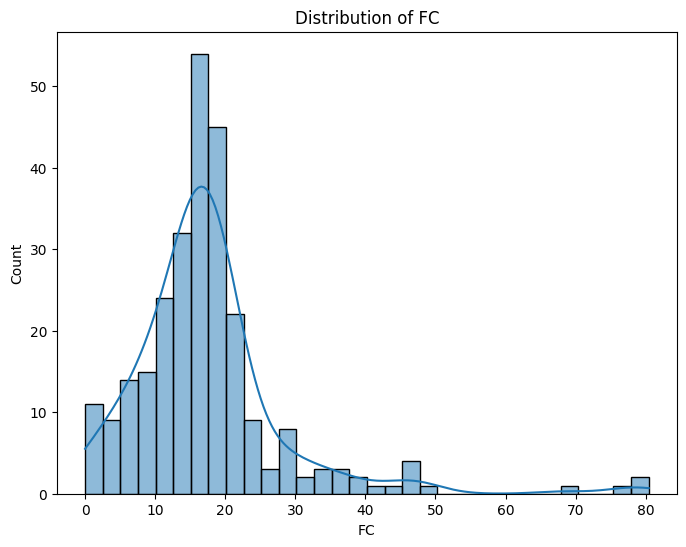

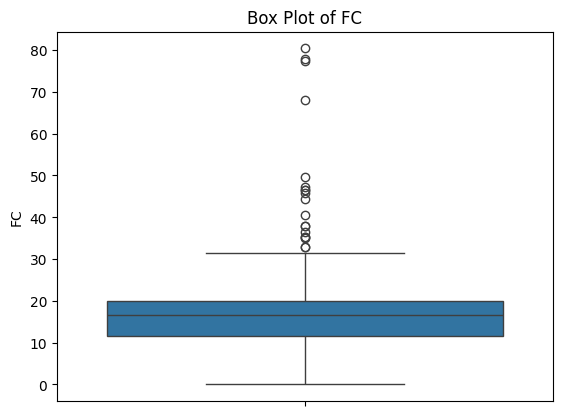

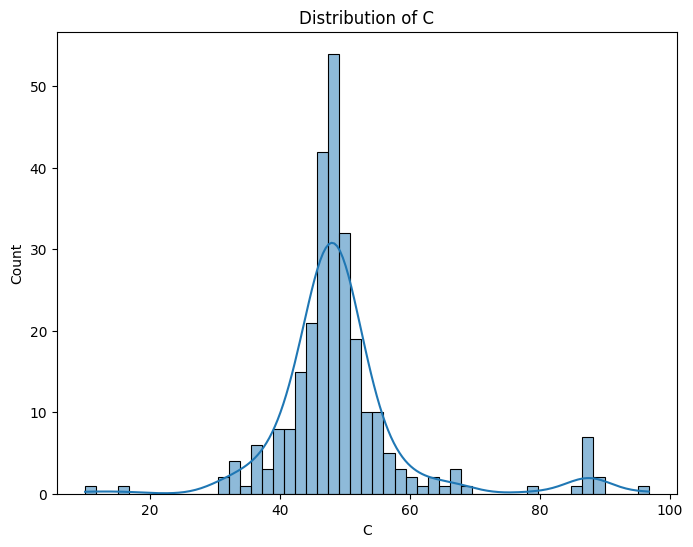

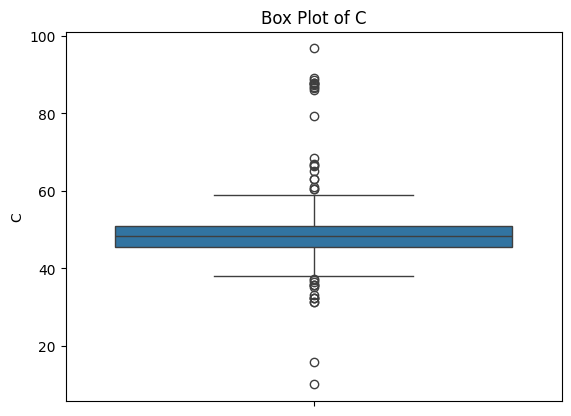

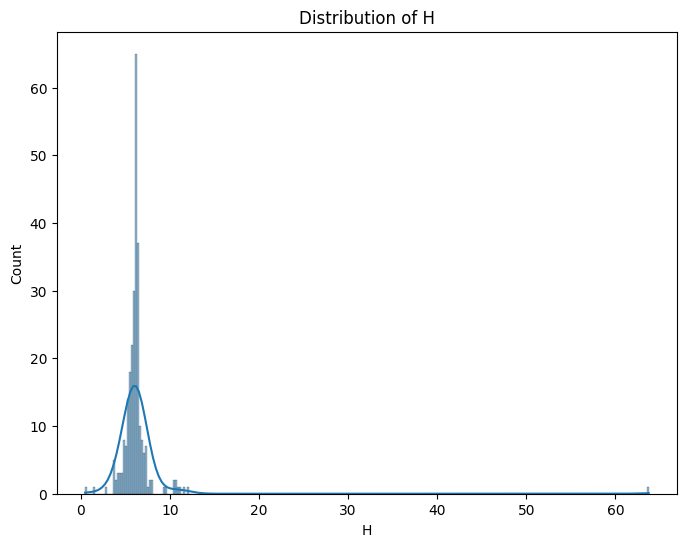

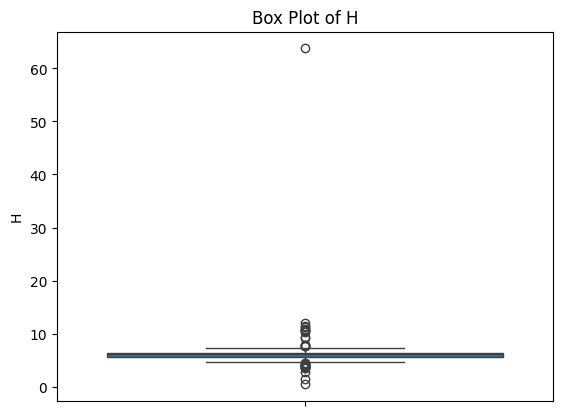

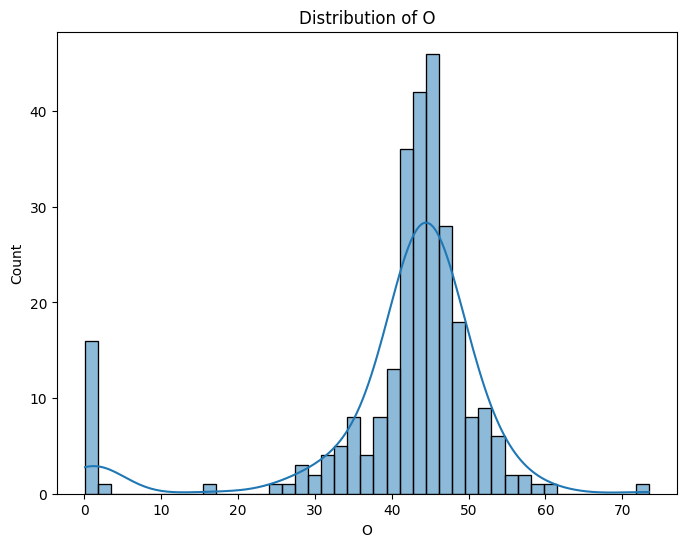

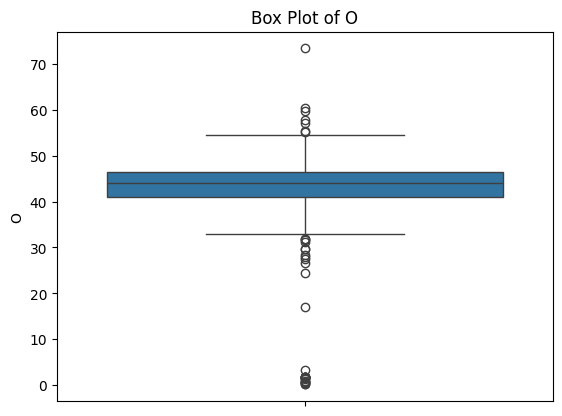

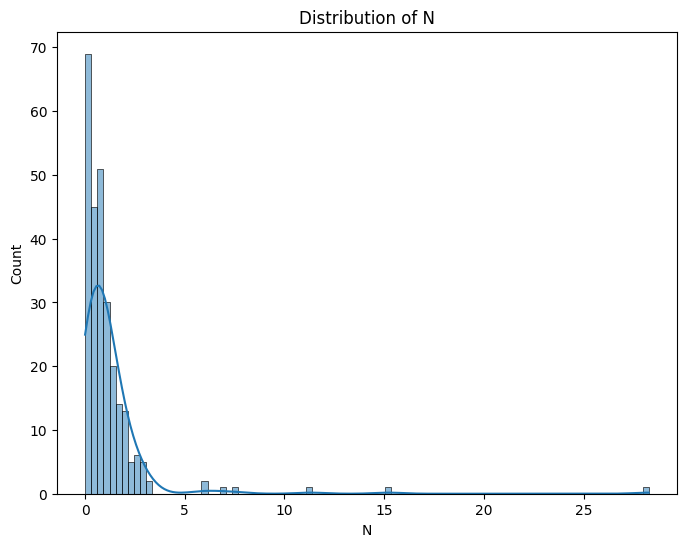

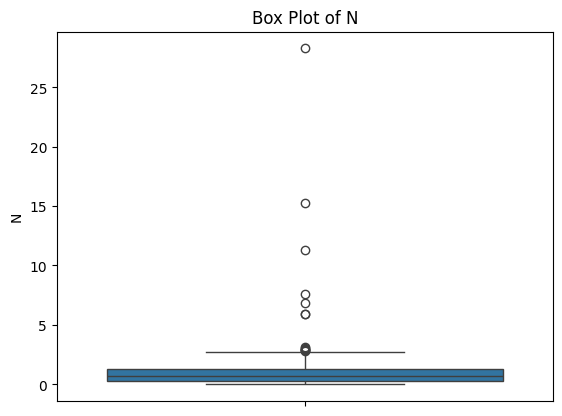

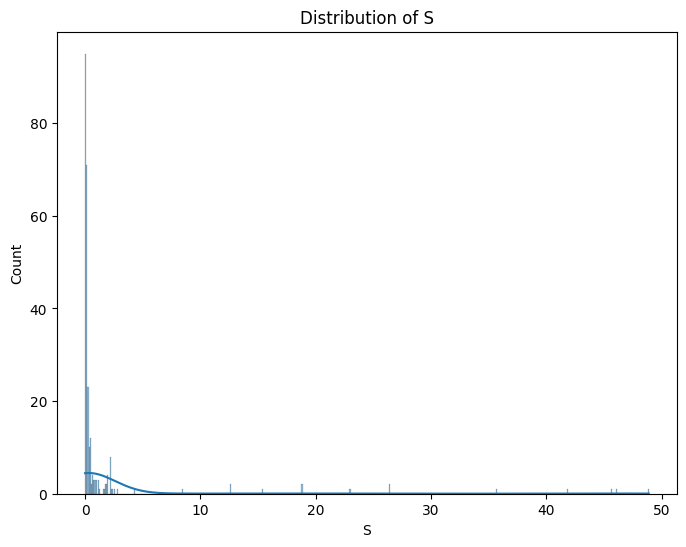

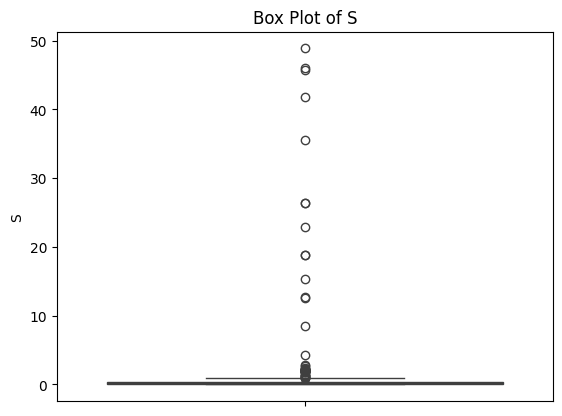

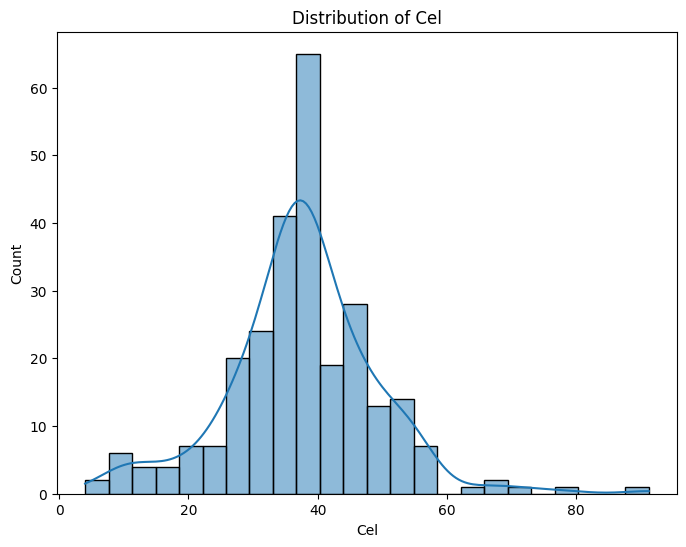

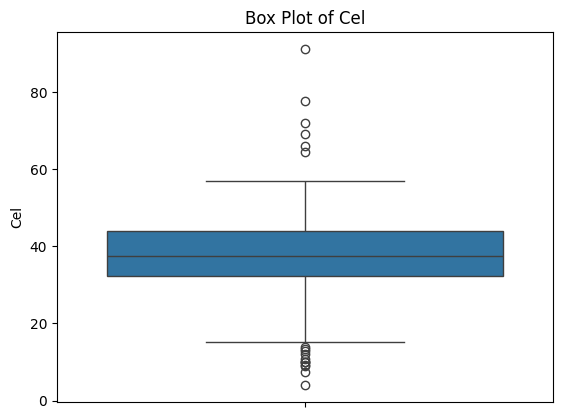

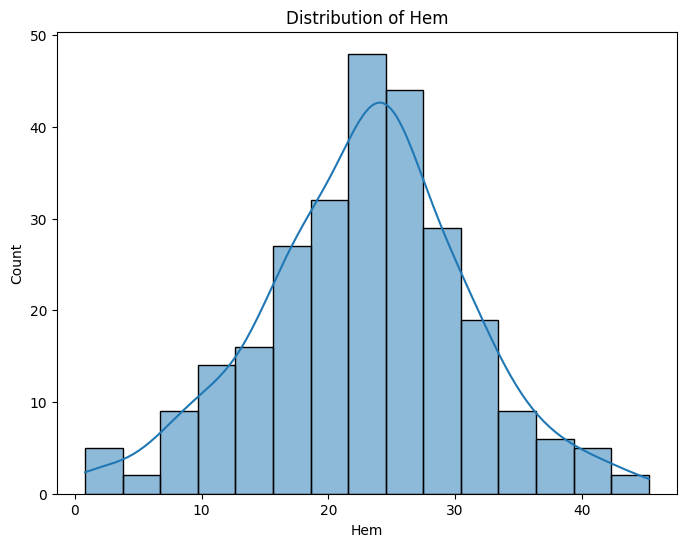

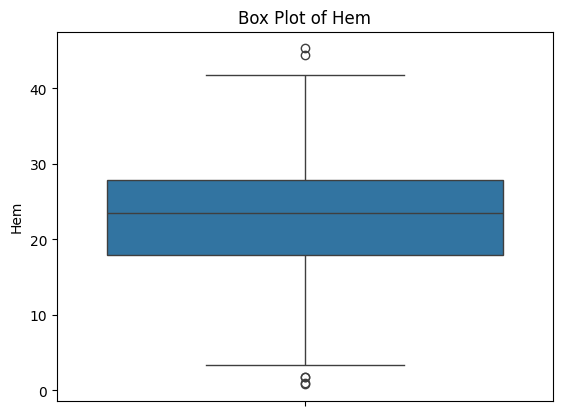

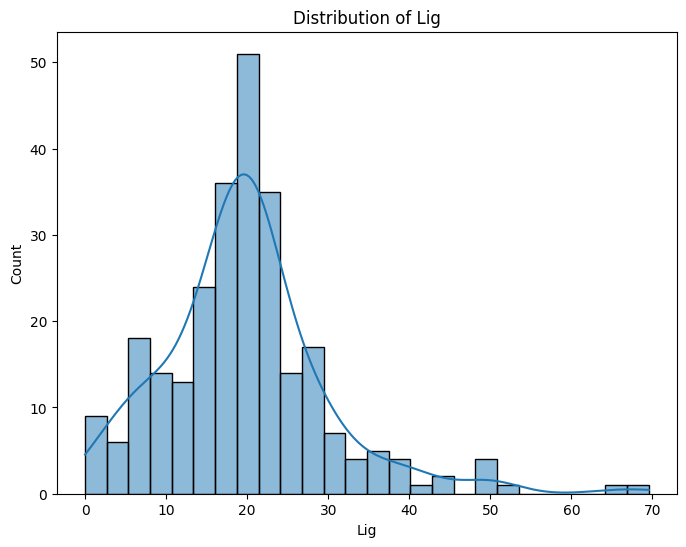

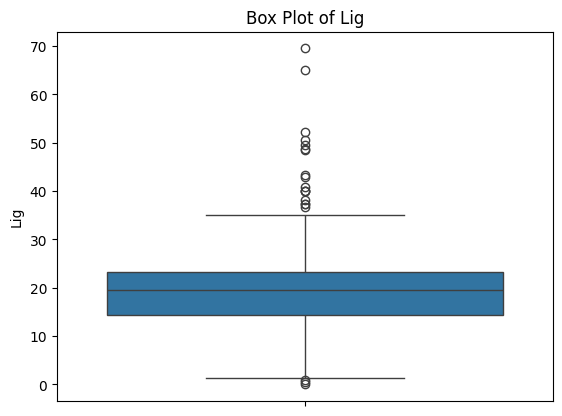

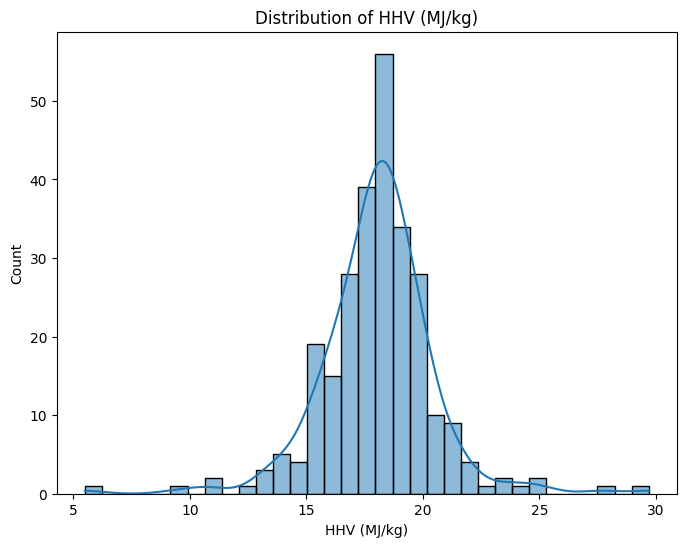

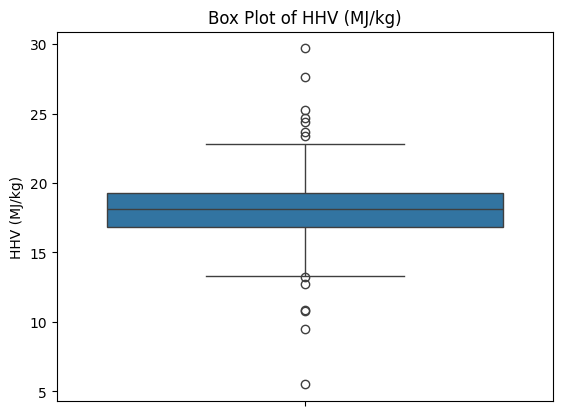

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
  # Histogram
   plt.figure(figsize=(8, 6))
   sns.histplot(data[column], kde=True)
   plt.title(f'Distribution of {column}')
   plt.show()
   # Box Plot plt.figure(figsize=(8, 6))
   sns.boxplot(y=data[column])
   plt.title(f'Box Plot of {column}')
   plt.show()

In [ ]:
data.isnull().sum()  # Check for missing values in each column

Biomass        6
ASH            0
VM             0
FC             0
C              0
H              0
O              0
N              0
S              0
Cel            0
Hem            0
Lig            0
HHV (MJ/kg)    0
Source         8
dtype: int64

In [88]:
from scipy.stats import kurtosis
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
for column in columns_to_check:
  kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
  print(f"Kurtosis of {column}: {kurt}")
  if kurt > 3:
    print(f"{column} has heavy tails (kurtosis > 3)")

Kurtosis of ASH: 45.775559011907504
ASH has heavy tails (kurtosis > 3)
Kurtosis of VM: 11.043395164548981
VM has heavy tails (kurtosis > 3)
Kurtosis of FC: 13.299479289695146
FC has heavy tails (kurtosis > 3)
Kurtosis of C: 9.705196677131635
C has heavy tails (kurtosis > 3)
Kurtosis of H: 208.46983300240063
H has heavy tails (kurtosis > 3)
Kurtosis of O: 8.385621021045056
O has heavy tails (kurtosis > 3)
Kurtosis of N: 92.43456089099377
N has heavy tails (kurtosis > 3)
Kurtosis of S: 31.653760953771428
S has heavy tails (kurtosis > 3)
Kurtosis of Cel: 5.32199537755065
Cel has heavy tails (kurtosis > 3)
Kurtosis of Hem: 3.241629256924841
Hem has heavy tails (kurtosis > 3)
Kurtosis of Lig: 6.505382775272934
Lig has heavy tails (kurtosis > 3)
Kurtosis of HHV (MJ/kg): 8.57918740914216
HHV (MJ/kg) has heavy tails (kurtosis > 3)


In [89]:
#removing the heavy tail using Winsorization
from scipy.stats.mstats import winsorize

# Columns to apply Winsorization
columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Apply Winsorization to each column
for column in columns_to_check:
    data[column] = winsorize(data[column], limits=[0.1, 0.1])  # Winsorize at 5% and 95% percentiles

In [ ]:
#Lets check kurtosis again


In [90]:
from scipy.stats import kurtosis

columns_to_check = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_check:
    kurt = kurtosis(data[column], fisher=False)  # Fisher=False for Pearson's kurtosis
    print(f"Kurtosis of {column}: {kurt}")
    if kurt > 3:
        print(f"{column} still has heavy tails (kurtosis > 3)")
    else:
        print(f"{column} now has less or no heavy tails (kurtosis <=3)")

Kurtosis of ASH: 1.9966771708894195
ASH now has less or no heavy tails (kurtosis <=3)
Kurtosis of VM: 2.1557252456736076
VM now has less or no heavy tails (kurtosis <=3)
Kurtosis of FC: 2.440796263871829
FC now has less or no heavy tails (kurtosis <=3)
Kurtosis of C: 2.4293635431025464
C now has less or no heavy tails (kurtosis <=3)
Kurtosis of H: 2.401769929356204
H now has less or no heavy tails (kurtosis <=3)
Kurtosis of O: 2.825399224106282
O now has less or no heavy tails (kurtosis <=3)
Kurtosis of N: 2.2162498415427536
N now has less or no heavy tails (kurtosis <=3)
Kurtosis of S: 4.54721471475422
S still has heavy tails (kurtosis > 3)
Kurtosis of Cel: 2.1857264039458806
Cel now has less or no heavy tails (kurtosis <=3)
Kurtosis of Hem: 2.01778448852608
Hem now has less or no heavy tails (kurtosis <=3)
Kurtosis of Lig: 2.180440681365956
Lig now has less or no heavy tails (kurtosis <=3)
Kurtosis of HHV (MJ/kg): 1.9904549302820793
HHV (MJ/kg) now has less or no heavy tails (kurtosi

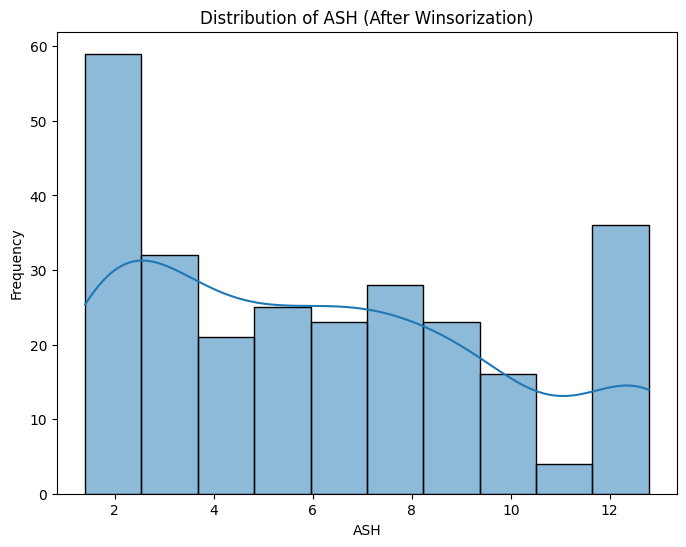

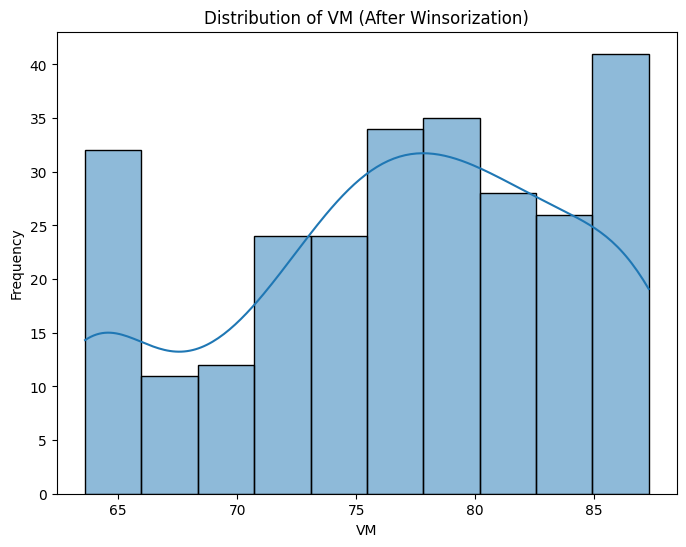

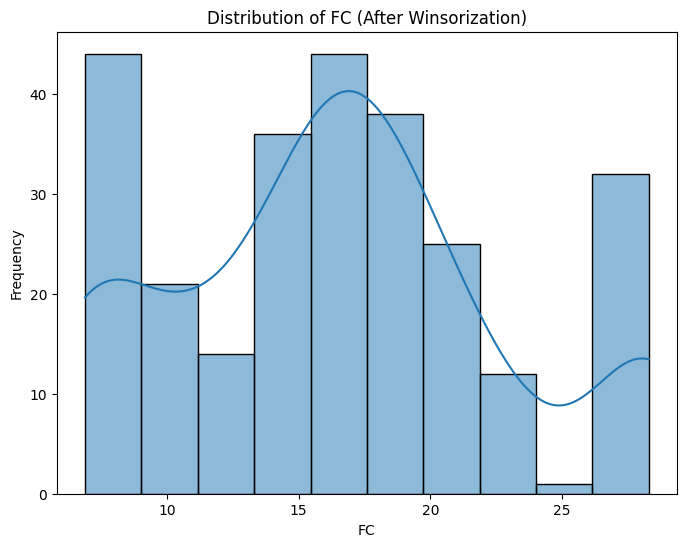

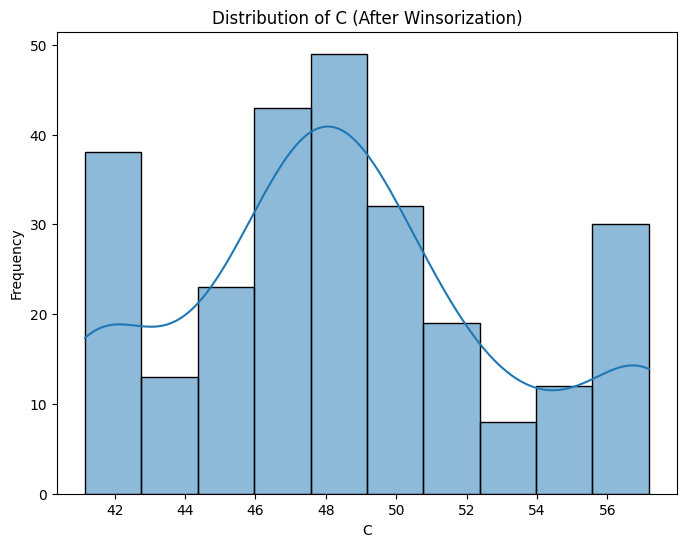

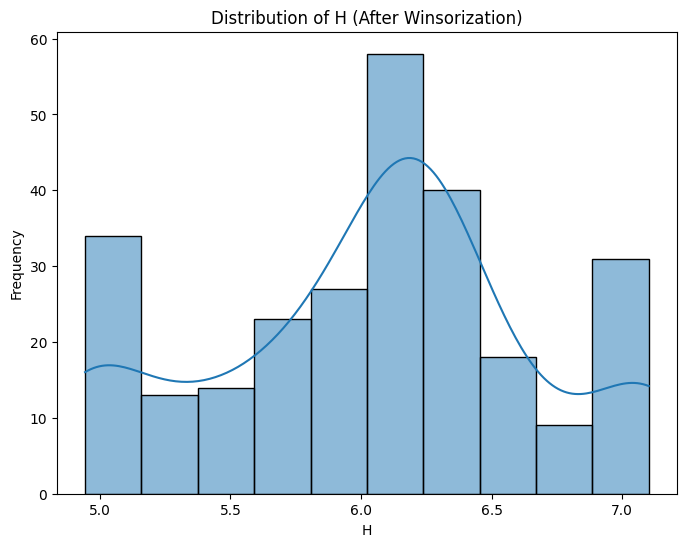

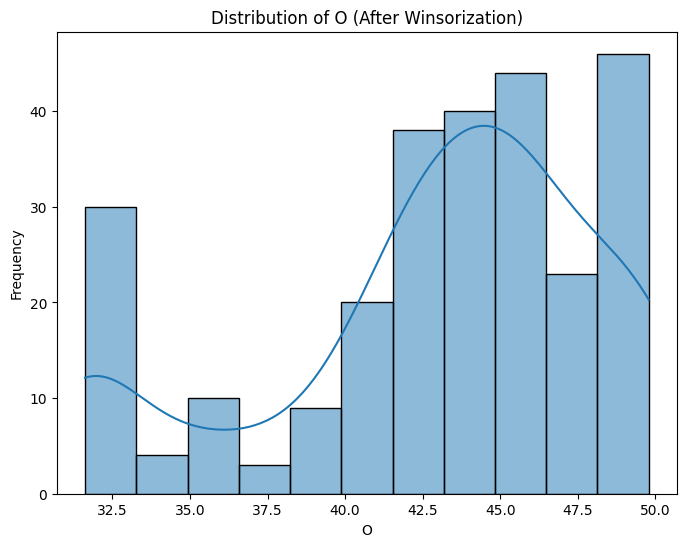

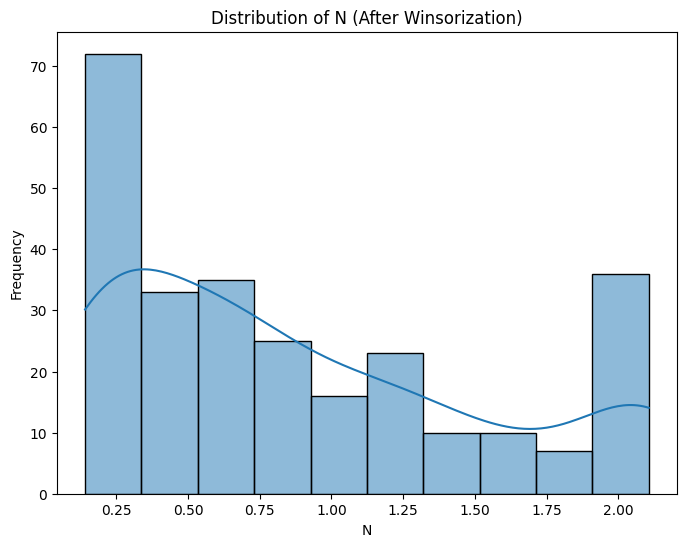

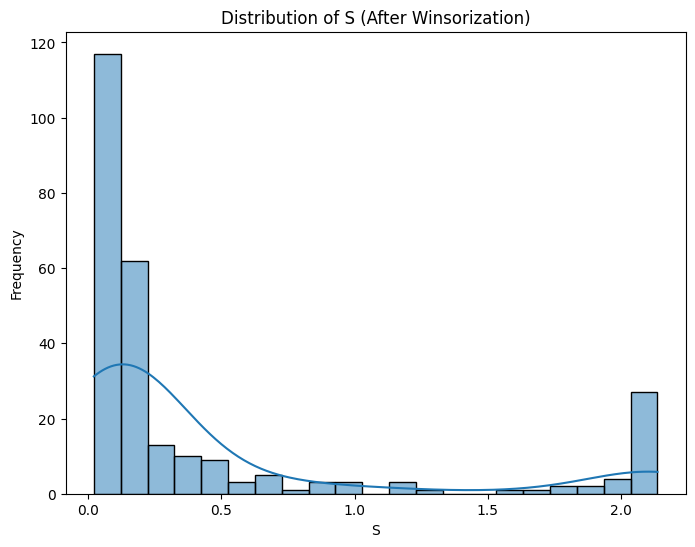

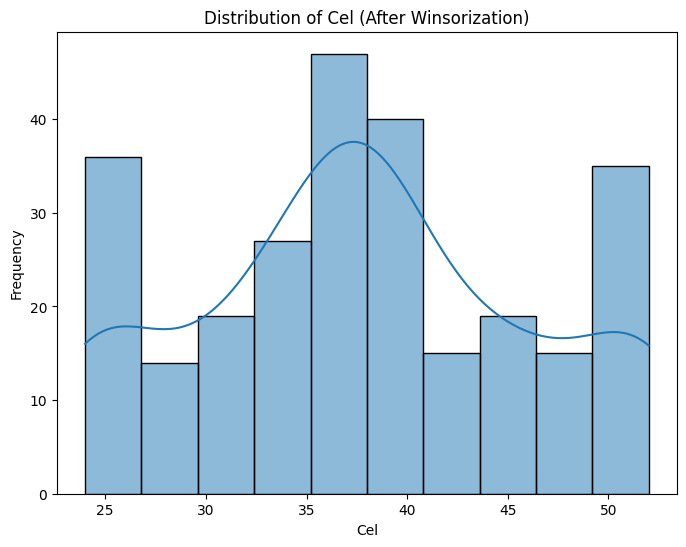

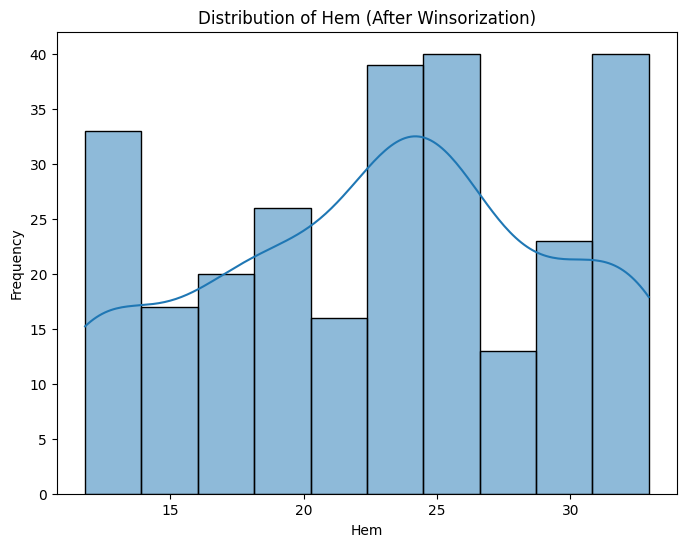

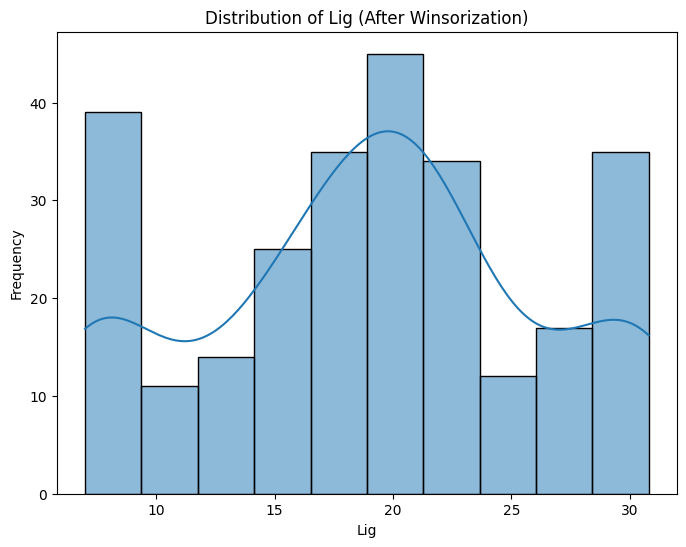

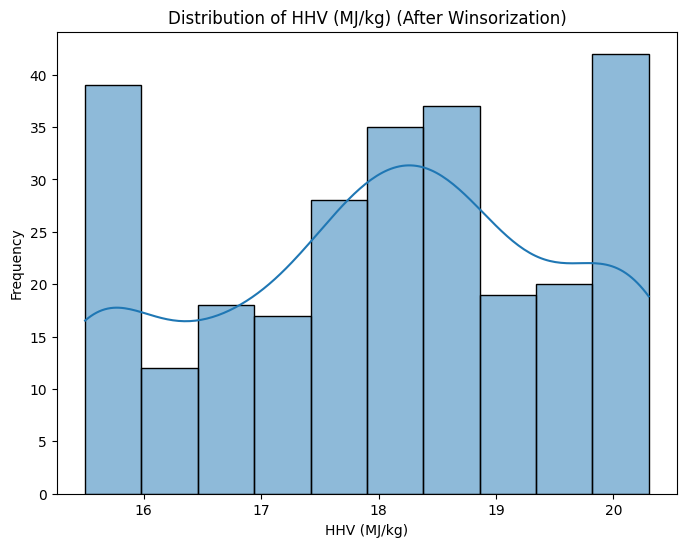

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(data[column], kde=True)  # kde=True adds a kernel density estimate curve
    plt.title(f'Distribution of {column} (After Winsorization)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [92]:
#print mising values
data.isnull().sum()

Biomass        6
ASH            0
VM             0
FC             0
C              0
H              0
O              0
N              0
S              0
Cel            0
Hem            0
Lig            0
HHV (MJ/kg)    0
Source         8
dtype: int64

In [93]:
#print descriptive stats to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
data.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

ASH     VM     FC      C      H      O      N      S    Cel    Hem  \
count 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00   
mean    6.17  76.78  16.42  48.45   6.04  42.91   0.88   0.46  37.78  22.88   
std     3.68   7.24   6.28   4.65   0.62   5.40   0.65   0.68   8.36   6.54   
min     1.40  63.61   6.89  41.16   4.94  31.62   0.14   0.02  24.00  11.80   
25%     2.90  72.15  11.56  45.53   5.68  40.98   0.30   0.08  32.25  17.96   
50%     5.70  77.60  16.70  48.27   6.14  44.02   0.68   0.15  37.60  23.46   
75%     8.98  82.47  19.84  51.03   6.40  46.56   1.29   0.41  44.00  27.90   
max    12.79  87.29  28.30  57.17   7.10  49.78   2.11   2.14  52.00  32.95   

         Lig  HHV (MJ/kg)  
count 267.00       267.00  
mean   19.02        18.03  
std     7.18         1.52  
min     7.00        15.50  
25%    14.34        16.84  
50%    19.50        18.11  
75%    23.25        19.25  
max    30.80        20.30

In [94]:
data.head()


Biomass   ASH    VM    FC     C    H     O    N    S   Cel  \
0        Alfalfa Stem  5.27 78.92 15.81 50.05 6.37 40.52 2.11 0.21 35.80   
1    alfalfa (lucern)  9.40 73.90 16.70 48.70 6.49 39.94 2.11 2.14 36.48   
2  alfalfa seed straw  7.25 72.60 20.15 49.80 5.75 43.37 1.06 0.02 41.65   
3    cotton gin trash 12.79 67.30 15.10 47.20 6.27 43.37 2.11 0.67 24.00   
4    cotton gin waste  9.36 82.16  8.48 54.10 5.20 38.71 1.60 0.40 52.00   

    Hem   Lig  HHV (MJ/kg) Source  
0 18.48 23.36        18.67    [1]  
1 24.26 15.34        18.60    [2]  
2 19.39 29.16        18.45    [2]  
3 11.80 17.60        16.42    [2]  
4 16.00  7.00        16.27    [2]

In [112]:
#Traing the GAN
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataframe (assuming it's already loaded as `data`)

# Extract numeric columns for GAN
numeric_features = [
    'ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S',
    'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'
]
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[numeric_features])

# Convert to PyTorch tensor
real_data = torch.tensor(data_scaled, dtype=torch.float32)

# Parameters
latent_dim = 16  # Size of noise vector
data_dim = real_data.shape[1]  # Number of features
batch_size = 16
epochs = 1000

# Define Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, data_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, data_dim),
            nn.Sigmoid()  # Output normalized to [0, 1]
        )

    def forward(self, z):
        return self.model(z)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, data_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(data_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()  # Binary classification output
        )

    def forward(self, x):
        return self.model(x)

# Initialize models
generator = Generator(latent_dim, data_dim)
discriminator = Discriminator(data_dim)

# Optimizers and loss function
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)
loss_function = nn.BCELoss()

# Training Loop
for epoch in range(epochs):
    for i in range(0, real_data.shape[0], batch_size):
        # Get real data batch
        #real_batch = real_data[i*batch_size:(i+1)*batch_size]
        real_batch = real_data[i:i + batch_size]
        current_batch_size = real_batch.shape[0]
        # Generate fake data
        noise = torch.randn(current_batch_size, latent_dim)
        fake_data = generator(noise)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones(current_batch_size, 1)
        fake_labels = torch.zeros(current_batch_size, 1)

        real_loss = loss_function(discriminator(real_batch), real_labels)
        fake_loss = loss_function(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        # Generator tries to fool the discriminator
        fake_labels = torch.ones(current_batch_size, 1)
        g_loss = loss_function(discriminator(fake_data), fake_labels)
        g_loss.backward()
        optimizer_G.step()

    # Log losses
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Generate 1000 synthetic data points
noise = torch.randn(1000, latent_dim)
synthetic_data = generator(noise).detach().numpy()

# Inverse transform to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=numeric_features)


Epoch 0, D Loss: 1.3846324682235718, G Loss: 0.7298729419708252
Epoch 100, D Loss: 0.8258616924285889, G Loss: 0.9277520775794983
Epoch 200, D Loss: 0.8028073310852051, G Loss: 1.7362269163131714
Epoch 300, D Loss: 0.35136353969573975, G Loss: 1.3383749723434448
Epoch 400, D Loss: 0.5091720223426819, G Loss: 1.3042426109313965
Epoch 500, D Loss: 0.6774726510047913, G Loss: 1.2519676685333252
Epoch 600, D Loss: 1.1792852878570557, G Loss: 1.1077252626419067
Epoch 700, D Loss: 0.6650753617286682, G Loss: 1.209269642829895
Epoch 800, D Loss: 1.7614176273345947, G Loss: 1.060624599456787
Epoch 900, D Loss: 0.8689572811126709, G Loss: 1.2031290531158447


In [113]:
synthetic_df.head()
#show datafram size
print(synthetic_df.shape)

(1000, 12)


In [114]:
#handling categorical values
import numpy as np

# Sample categorical features
synthetic_df['Biomass'] = np.random.choice(
    data['Biomass'].unique(), size=1000, replace=True
)
synthetic_df['Source'] = np.random.choice(
    data['Source'].unique(), size=1000, replace=True
)


In [115]:
synthetic_df.head()

ASH    VM    FC     C    H     O    N    S   Cel   Hem   Lig  HHV (MJ/kg)  \
0  1.55 68.27 25.32 50.62 6.60 33.99 2.09 2.13 26.77 13.41  7.46        20.15   
1  9.18 75.30 16.02 47.81 6.44 46.54 0.46 0.02 46.34 25.24 24.34        16.89   
2 10.74 67.39 17.63 42.59 6.16 48.99 1.63 0.07 29.50 23.86 24.31        15.87   
3  3.64 85.67  9.97 52.92 7.01 36.45 0.14 0.02 51.99 28.66  9.22        18.79   
4  8.87 71.84 16.28 53.51 6.99 37.00 0.47 0.02 51.68 23.51 18.03        17.97   

                           Biomass Source  
0                            Alder   [32]  
1           Grape pomace left over   [51]  
2                     Wood SawDust   [55]  
3                     Barley Straw   [49]  
4  Grape skin and seeds(air dried)   [51]

In [116]:
synthetic_df.to_csv('synthetic_data.csv', index=False)

In [100]:
from google.colab import files
files.download('synthetic_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
# Use describe on the real data and synthetic data to inspect their statistics
real_data_stats = data.describe()  # Statistics for the original real data
synthetic_data_stats = synthetic_df.describe()  # Statistics for synthetic data

# Show the summary statistics
print("Real Data Statistics:")
print(real_data_stats)

print("\nSynthetic Data Statistics:")
print(synthetic_data_stats)


Real Data Statistics:
         ASH     VM     FC      C      H      O      N      S    Cel    Hem  \
count 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00 267.00   
mean    6.17  76.78  16.42  48.45   6.04  42.91   0.88   0.46  37.78  22.88   
std     3.68   7.24   6.28   4.65   0.62   5.40   0.65   0.68   8.36   6.54   
min     1.40  63.61   6.89  41.16   4.94  31.62   0.14   0.02  24.00  11.80   
25%     2.90  72.15  11.56  45.53   5.68  40.98   0.30   0.08  32.25  17.96   
50%     5.70  77.60  16.70  48.27   6.14  44.02   0.68   0.15  37.60  23.46   
75%     8.98  82.47  19.84  51.03   6.40  46.56   1.29   0.41  44.00  27.90   
max    12.79  87.29  28.30  57.17   7.10  49.78   2.11   2.14  52.00  32.95   

         Lig  HHV (MJ/kg)  
count 267.00       267.00  
mean   19.02        18.03  
std     7.18         1.52  
min     7.00        15.50  
25%    14.34        16.84  
50%    19.50        18.11  
75%    23.25        19.25  
max    30.80        20.30  

Synthetic Dat

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

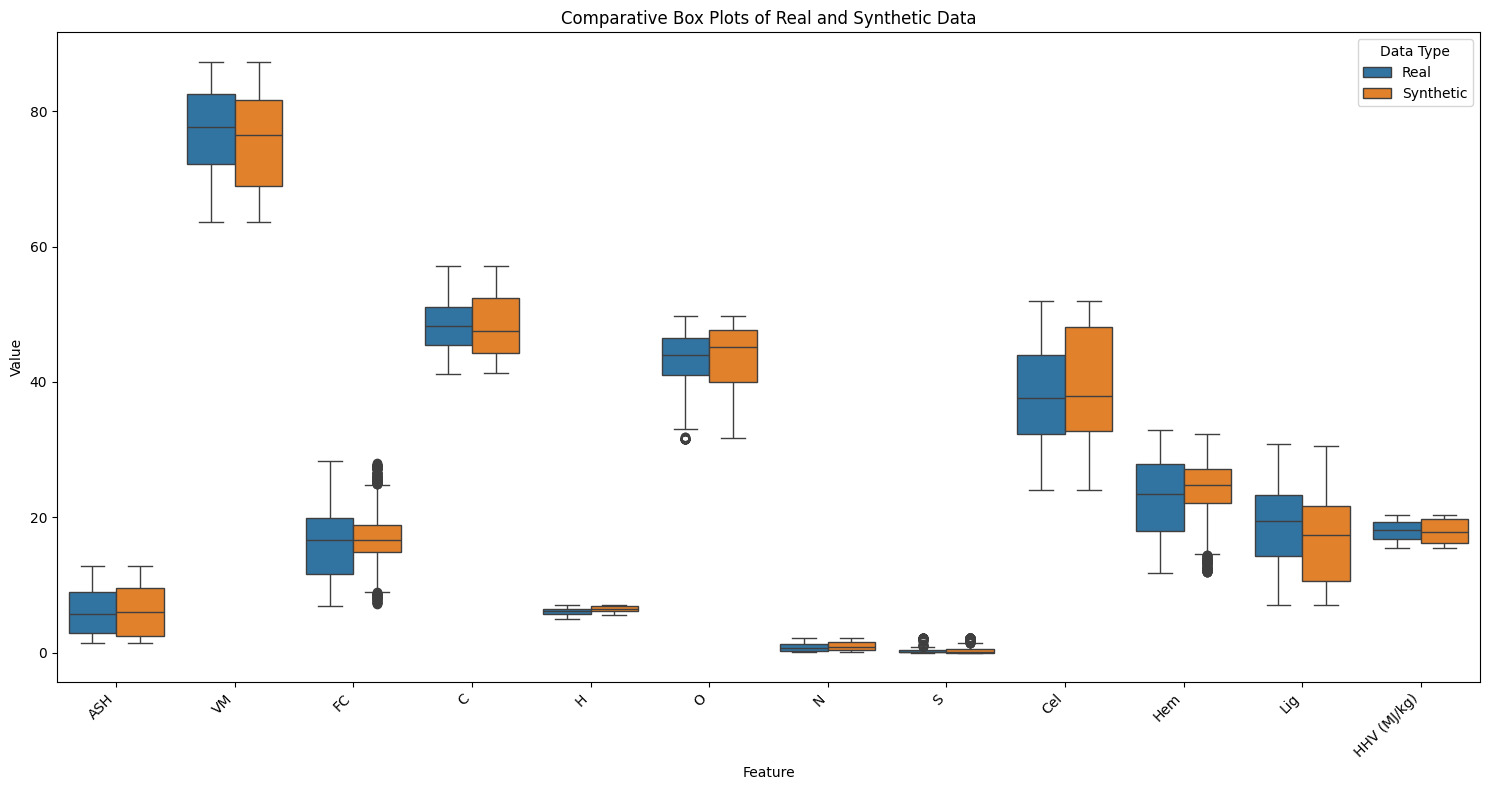

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Melt the dataframes to long format for easier plotting
real_data_melt = pd.melt(data, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')
synthetic_data_melt = pd.melt(synthetic_df, value_vars=['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)'], var_name='Feature', value_name='Value')

# Concatenate the melted dataframes and add a 'Data Type' column
real_data_melt['Data Type'] = 'Real'
synthetic_data_melt['Data Type'] = 'Synthetic'
all_data_melt = pd.concat([real_data_melt, synthetic_data_melt])

# Create the box plot
plt.figure(figsize=(15, 8))  # Adjust figure size as needed
sns.boxplot(x='Feature', y='Value', hue='Data Type', data=all_data_melt)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Comparative Box Plots of Real and Synthetic Data')
plt.tight_layout()
plt.show()

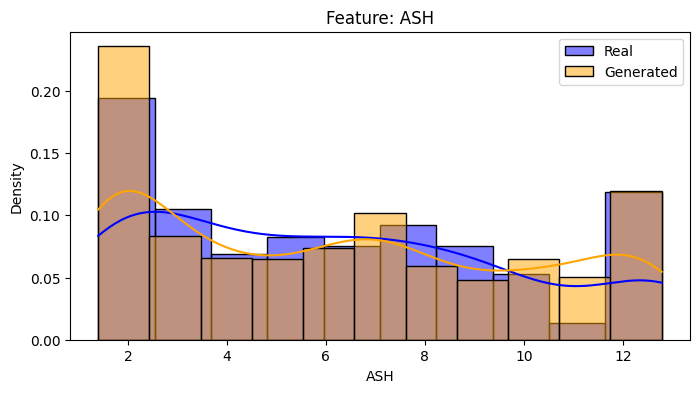

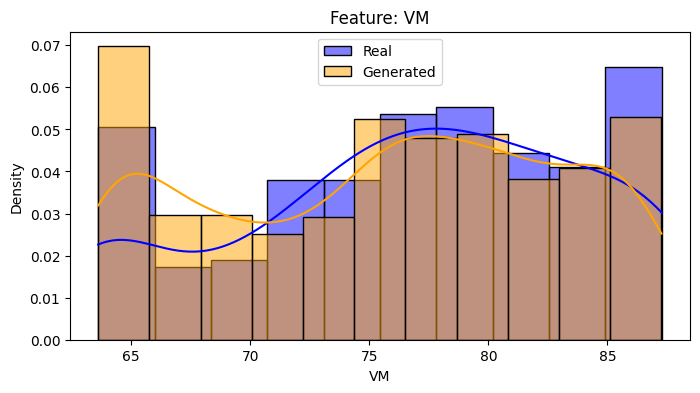

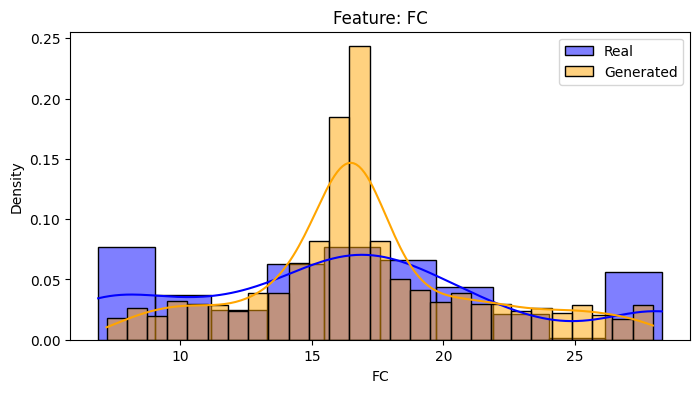

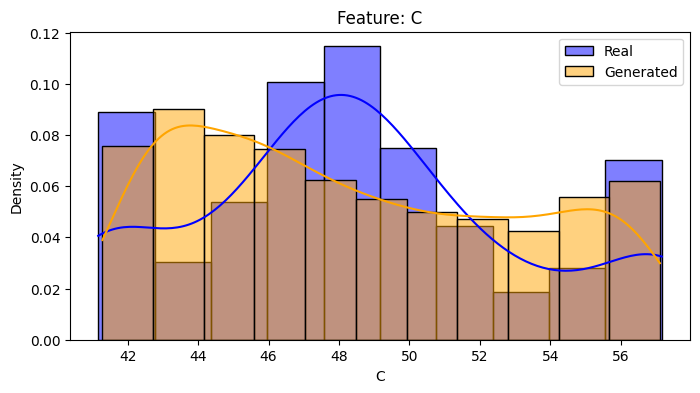

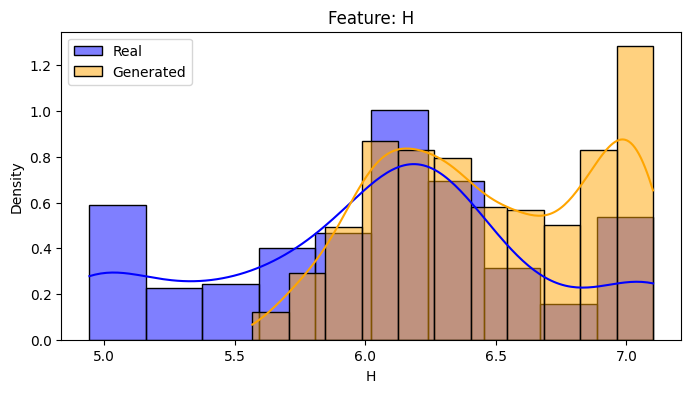

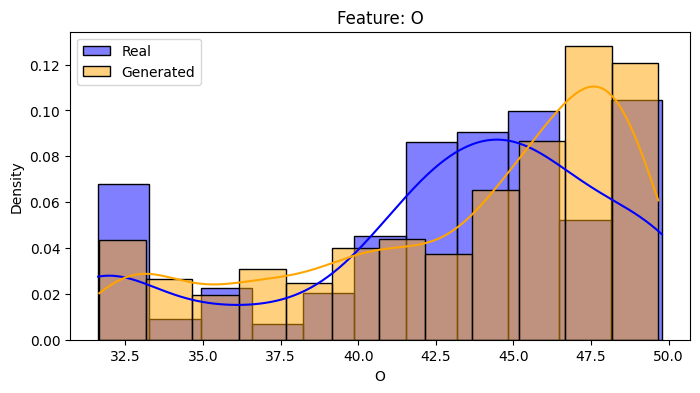

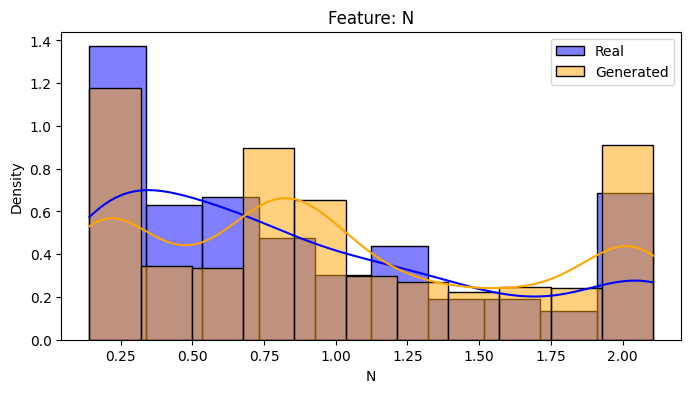

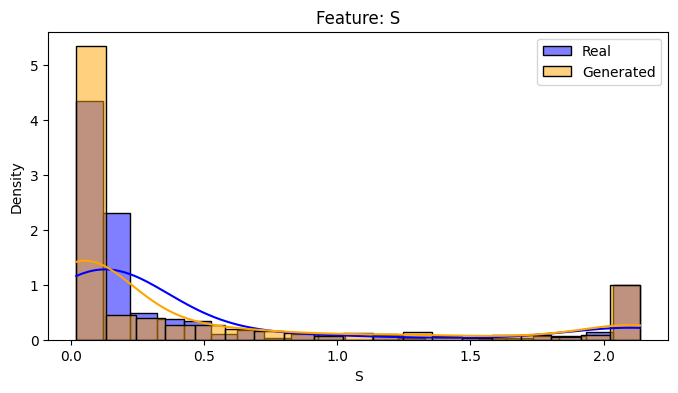

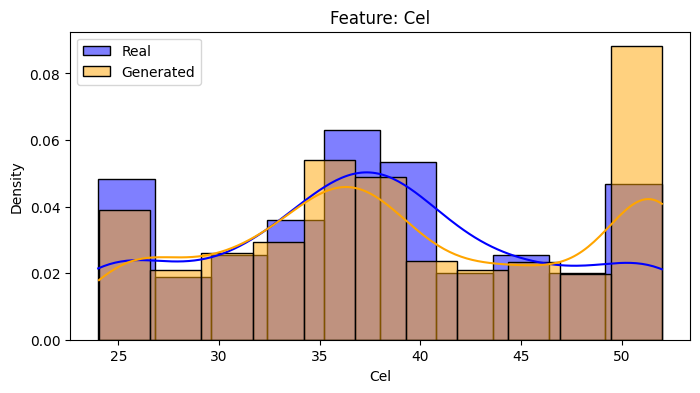

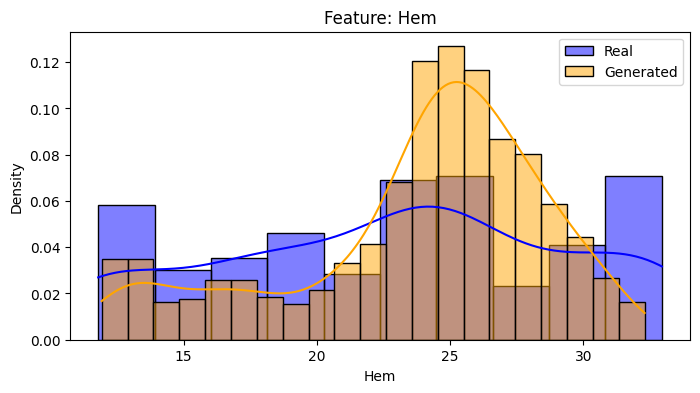

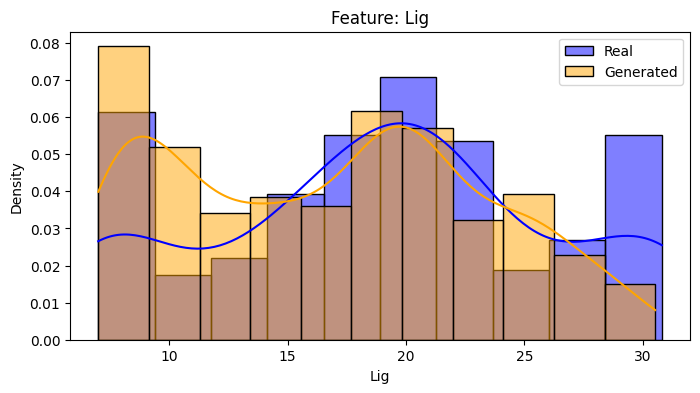

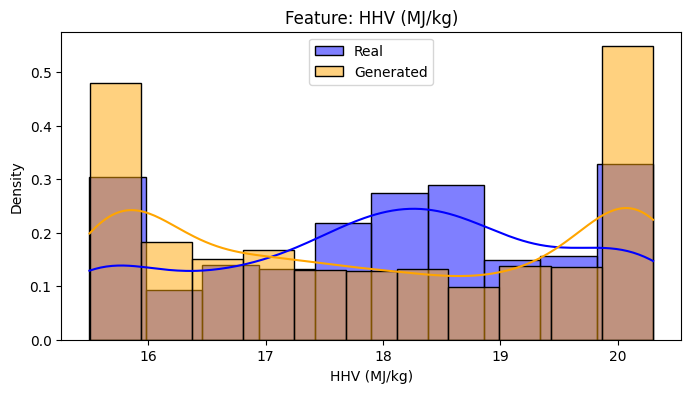

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


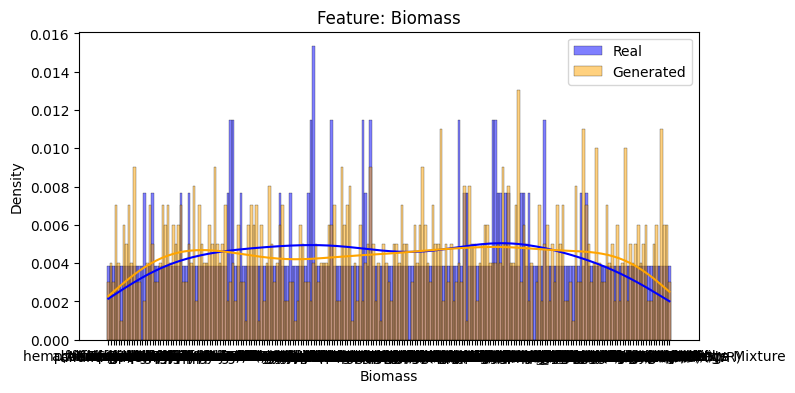

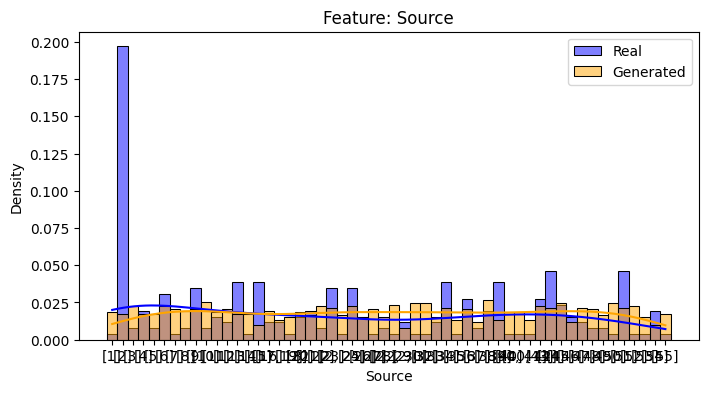

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in synthetic_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], color='blue', label='Real', kde=True, stat="density")
    sns.histplot(synthetic_df[column], color='orange', label='Generated', kde=True, stat="density")
    plt.title(f"Feature: {column}")
    plt.legend()
    plt.show()


In [ ]:
#ploting box plots
import matplotlib.pyplot as plt
import seaborn as sns


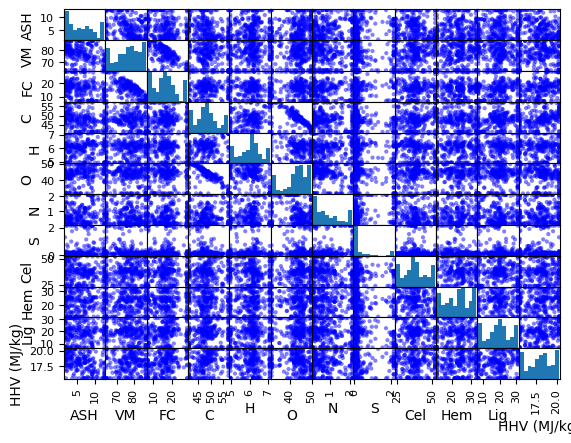

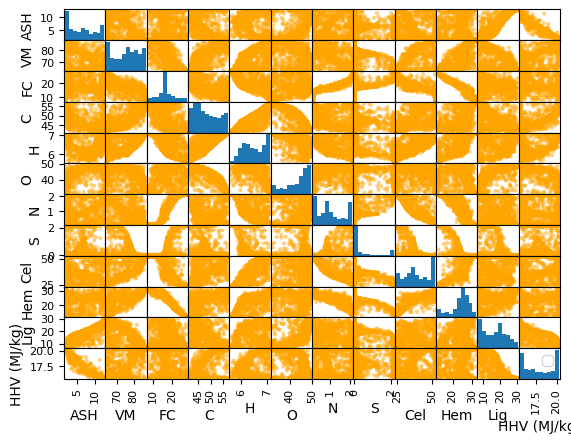

In [123]:
import pandas as pd
from pandas.plotting import scatter_matrix

scatter_matrix(data[numeric_features], alpha=0.5, label='Real', color='blue')
scatter_matrix(synthetic_df, alpha=0.5, label='Generated', color='orange')
plt.legend()
plt.show()


**Regression Plots:**
Purpose: To visualize the relationship between two variables and identify potential predictors (features) for your target variable (HHV in this case). Reasoning: By observing the trend and scatter of points in the regression plot, you can get an idea of the strength and direction of the relationship between the two variables. A clear trend suggests a strong predictive relationship.

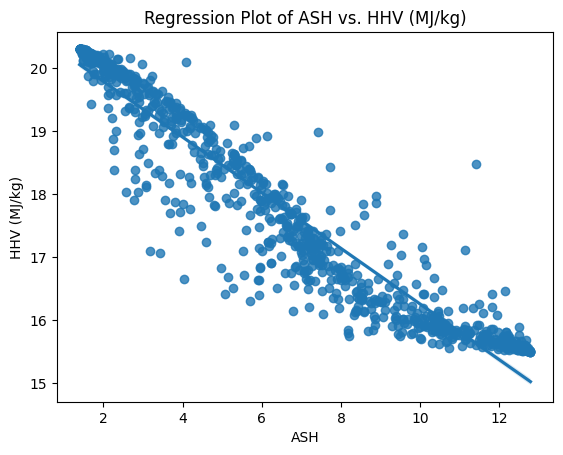

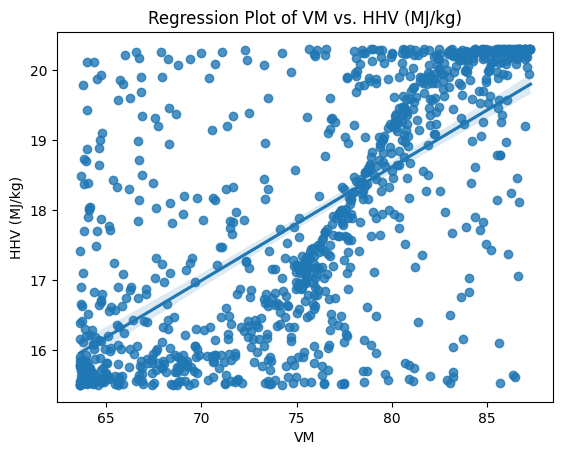

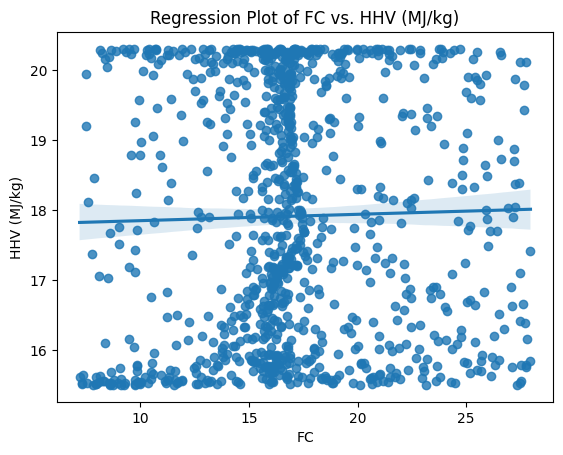

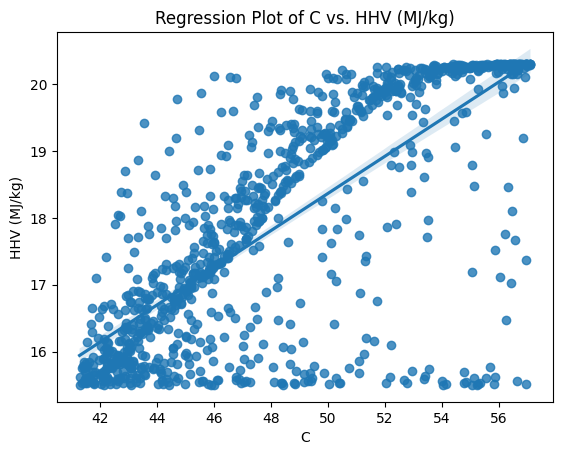

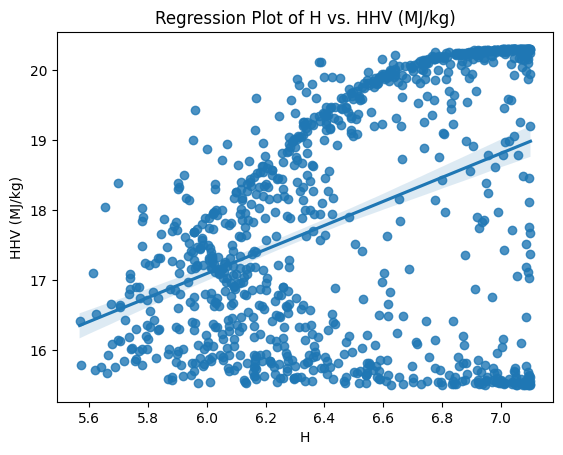

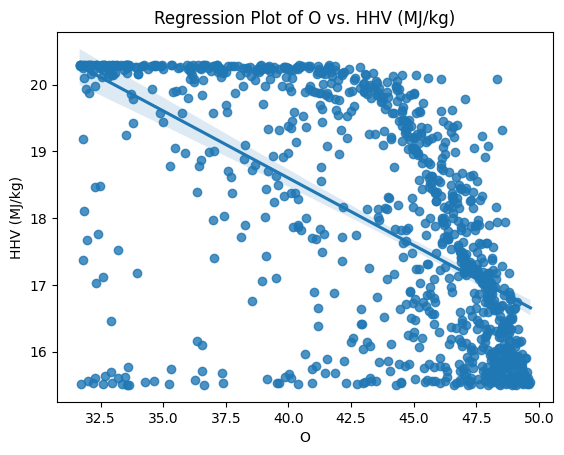

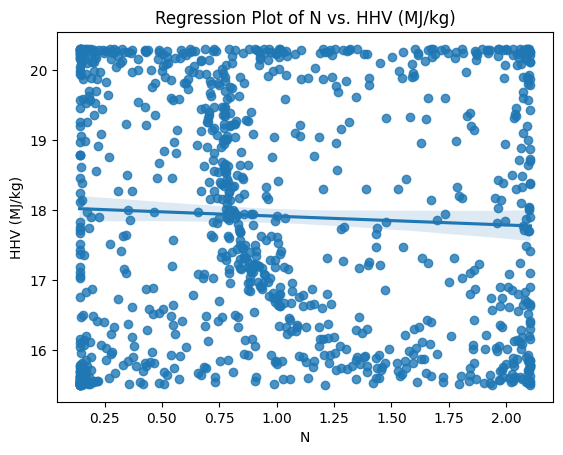

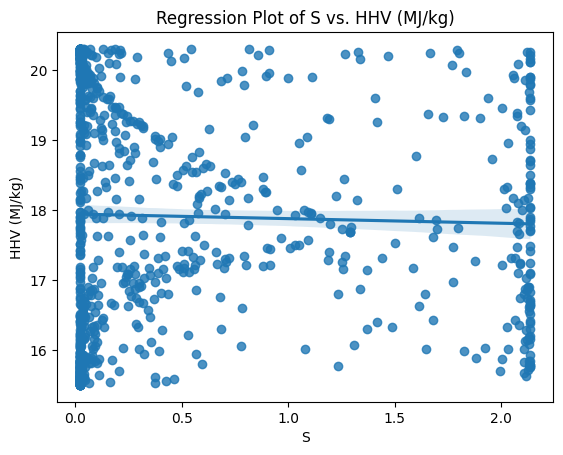

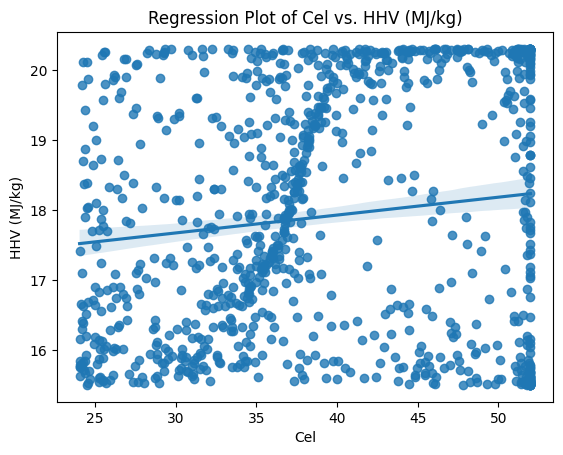

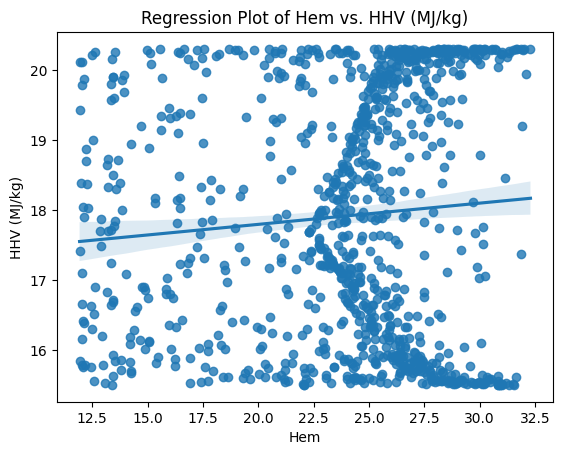

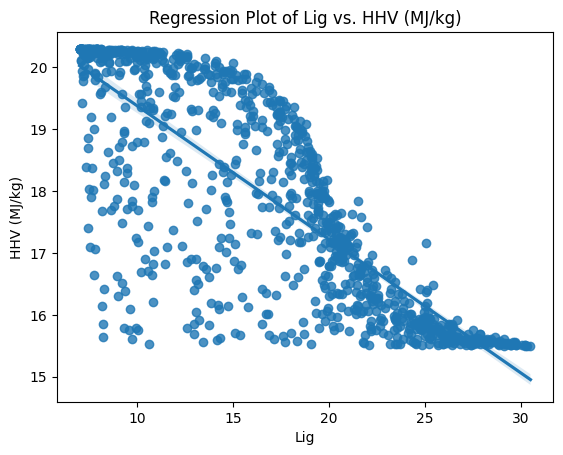

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot against 'HHV (MJ/kg)'
columns_to_plot = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']

# Loop through each column and create a regression plot
for column in columns_to_plot:
    sns.regplot(x=column, y='HHV (MJ/kg)', data=synthetic_df)
    plt.title(f'Regression Plot of {column} vs. HHV (MJ/kg)')  # Dynamic title
    plt.show()

              ASH    VM    FC     C     H     O     N     S   Cel   Hem   Lig  \
ASH          1.00 -0.63 -0.11 -0.61 -0.24  0.54 -0.04 -0.13  0.02  0.03  0.87   
VM          -0.63  1.00 -0.63  0.77  0.57 -0.42 -0.64 -0.51  0.59  0.67 -0.48   
FC          -0.11 -0.63  1.00 -0.41 -0.56  0.11  0.91  0.72 -0.80 -0.94 -0.19   
C           -0.61  0.77 -0.41  1.00  0.81 -0.82 -0.41 -0.37  0.60  0.46 -0.58   
H           -0.24  0.57 -0.56  0.81  1.00 -0.67 -0.51 -0.60  0.79  0.61 -0.29   
O            0.54 -0.42  0.11 -0.82 -0.67  1.00  0.08 -0.00 -0.35 -0.09  0.71   
N           -0.04 -0.64  0.91 -0.41 -0.51  0.08  1.00  0.65 -0.86 -0.86 -0.15   
S           -0.13 -0.51  0.72 -0.37 -0.60 -0.00  0.65  1.00 -0.70 -0.84 -0.28   
Cel          0.02  0.59 -0.80  0.60  0.79 -0.35 -0.86 -0.70  1.00  0.80  0.02   
Hem          0.03  0.67 -0.94  0.46  0.61 -0.09 -0.86 -0.84  0.80  1.00  0.18   
Lig          0.87 -0.48 -0.19 -0.58 -0.29  0.71 -0.15 -0.28  0.02  0.18  1.00   
HHV (MJ/kg) -0.96  0.68  0.0

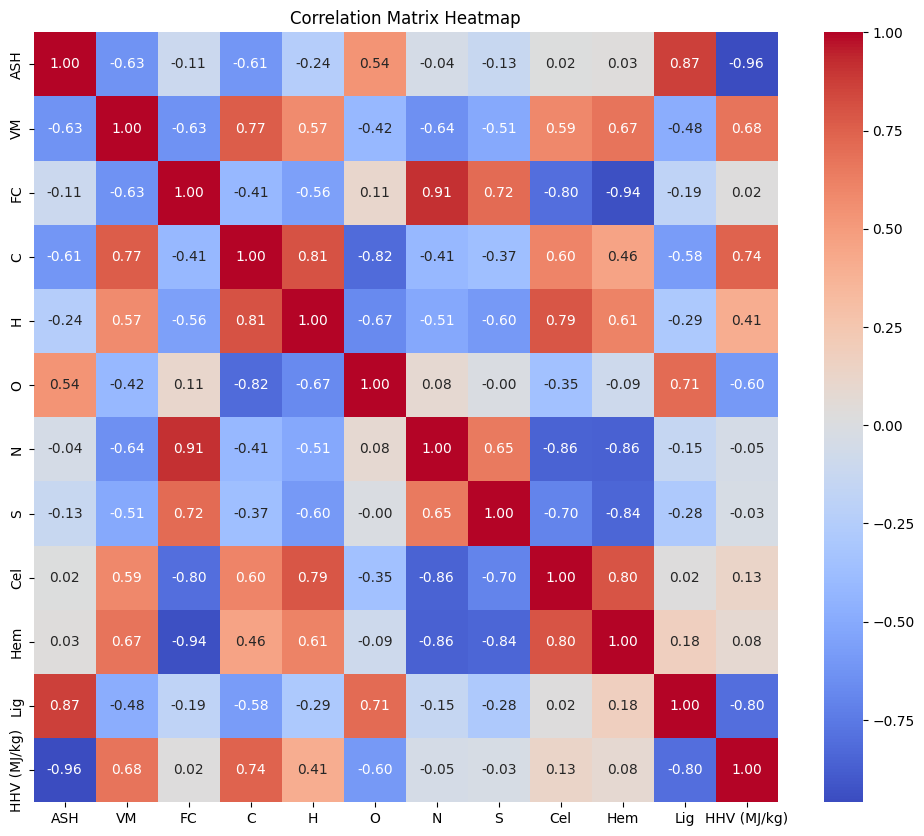

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# and you want to include all columns in the correlation matrix
# columns_for_correlation = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']
columns_for_correlation = ['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig', 'HHV (MJ/kg)']

# Calculate the correlation matrix
correlation_matrix = synthetic_df[columns_for_correlation].corr()
print(correlation_matrix)  # Print the correlation matrix
# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


**Step 1: Model Training, Cross-Validation, and Evaluation**

In [ ]:
!pip uninstall tf-keras

In [ ]:
!pip install tf-keras==2.18.0

In [ ]:
#!pip install tensorflow
#pip install --upgrade tensorflow
!pip install tensorflow --upgrade


ERROR: Operation cancelled by user


In [ ]:
import xgboost as xgb
import tensorflow as tf
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import tensorflow as tf
from sklearn.model_selection import GridSearchCV


In [ ]:
# Assuming 'data' is your DataFrame and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

In [ ]:
import sklearn
print(sklearn.__version__)


1.5.2


<ipython-input-41-58be0f0094d0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 325.1238
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 324.7117  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 321.9128  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314.9830  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 301.5356 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 308.9800 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 306.6215 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 286.4914 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 277.4844 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 273.4529 
Epoch 

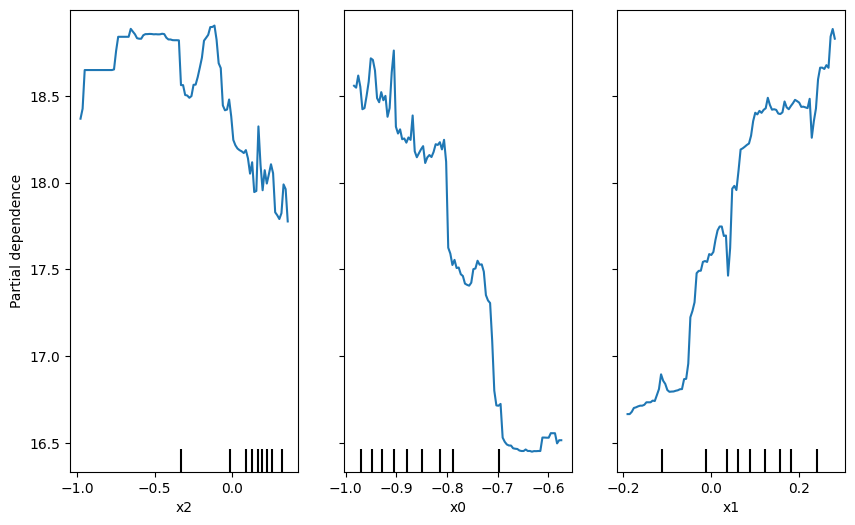

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


<ipython-input-42-e8fd41bf17ba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 343.5558
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 325.7763 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.4523 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 327.5919 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 315.7142 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304.3593 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.6742 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 305.5703 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 295.0365 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.8963 
Epoch 11/

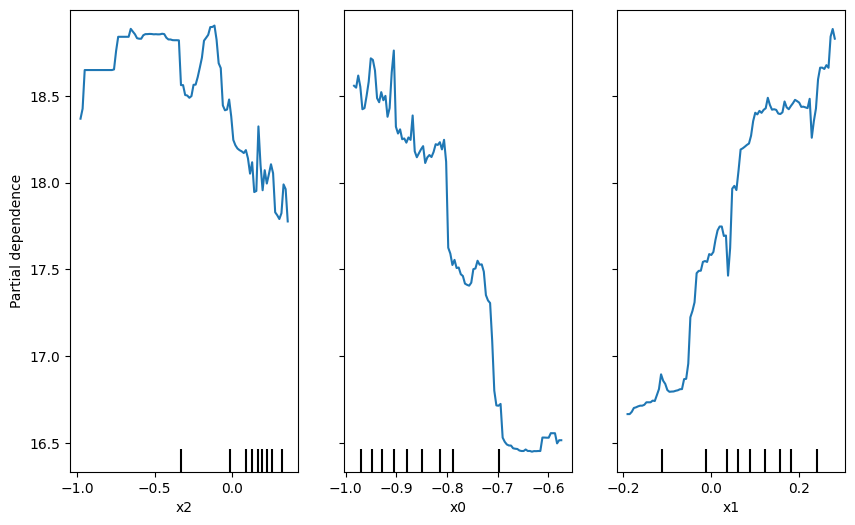

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


In [ ]:
#install polynomial features
!pip install -U scikit-learn

<ipython-input-51-e8fd41bf17ba>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue


Selected Features: [ True False False  True False  True False False False False False]
Feature Ranking: [1 5 2 1 4 1 3 8 9 6 7]
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 330.9431
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 328.2911  
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 321.0217  
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 309.6455 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 307.3333 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300.3532  
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 299.2382 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 286.1252 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 269.5600  
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250.3067  
Epoc

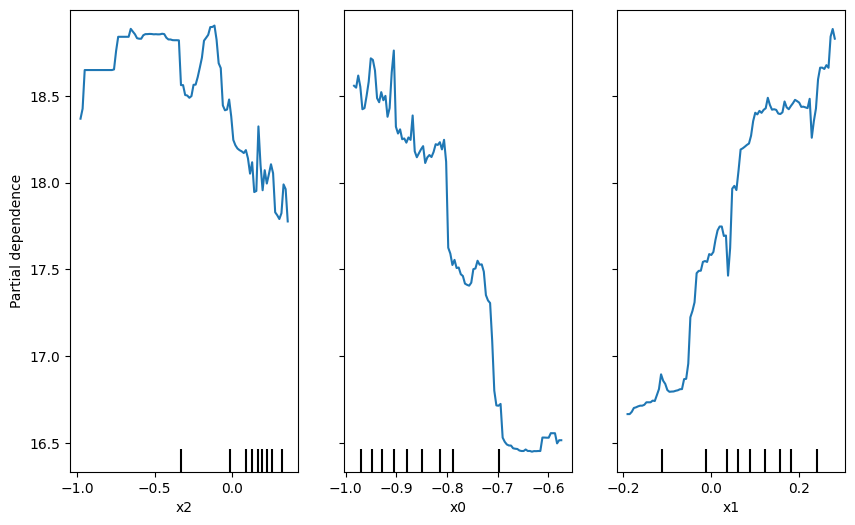

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values in X
X.replace('-', np.nan, inplace=True)  # Replace '-' with NaN if that's the issue
X = X.apply(pd.to_numeric, errors='coerce')  # Convert columns to numeric, invalid parsing will be set as NaN
X.fillna(X.mean(), inplace=True)  # Fill missing values with the column mean

# Handle missing values in y (target variable)
y = y.dropna()  # Drop rows where target variable y has NaN values

# Ensure X and y have matching number of rows after dropping missing target rows
X = X.iloc[y.index]

# Scaling the features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)  # Scale features

# Feature Selection using RandomForestRegressor
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)  # Selecting top 3 features
X_selected = rf_selector.fit_transform(X_scaled, y)

print("Selected Features:", rf_selector.support_)
print("Feature Ranking:", rf_selector.ranking_)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Model hyperparameters for RF, ET, XGBoost, and ANN
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# 1. Hyperparameter Tuning for RandomForestRegressor with GridSearchCV
rf_model = GridSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, cv=10, n_jobs=-1, verbose=1)
rf_model.fit(X_train, y_train)

# 2. Hyperparameter Tuning for XGBoost with GridSearchCV
xgb_model = GridSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, cv=10, n_jobs=-1, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Hyperparameter Tuning for ExtraTreesRegressor with GridSearchCV
et_model = GridSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, cv=10, n_jobs=-1, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(20, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate models and report results
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))

# Plot partial dependence
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import PartialDependenceDisplay
import tensorflow as tf
import matplotlib.pyplot as plt

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)  # Ensure TensorFlow's randomness is also controlled

# Assuming 'data' is your dataset, and 'HHV (MJ/kg)' is the target variable
X = data[['ASH', 'VM', 'FC', 'C', 'H', 'O', 'N', 'S', 'Cel', 'Hem', 'Lig']]  # Features
y = data['HHV (MJ/kg)']  # Target variable

# Handle missing values
X.replace('-', np.nan, inplace=True)
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)
y = y.dropna()
X = X.iloc[y.index]

# Scale features
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Feature Selection
rf_selector = RFE(estimator=RandomForestRegressor(random_state=seed), n_features_to_select=3)
X_selected = rf_selector.fit_transform(X_scaled, y)

# Split data with a fixed random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=seed)

# Hyperparameter grids
param_grid_rf = {
    'n_estimators': [200, 400, 600],
    'max_depth': [20, 30, 50],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

param_grid_et = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5]
}

# 1. Random Forest with RandomizedSearchCV
rf_model = RandomizedSearchCV(RandomForestRegressor(random_state=seed), param_grid_rf, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
rf_model.fit(X_train, y_train)

# 2. XGBoost with RandomizedSearchCV
xgb_model = RandomizedSearchCV(xgb.XGBRegressor(random_state=seed), param_grid_xgb, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
xgb_model.fit(X_train, y_train)

# 3. Extra Trees with RandomizedSearchCV
et_model = RandomizedSearchCV(ExtraTreesRegressor(random_state=seed), param_grid_et, n_iter=30, cv=10, n_jobs=-1, random_state=seed, verbose=1)
et_model.fit(X_train, y_train)

# 4. Define and Train the ANN Model
""""def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))  # First hidden layer
    model.add(Dense(20, activation=activation))  # Second hidden layer
    model.add(Dense(20, activation=activation))  # Third hidden layer
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model
"""
def create_ann_model(activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape
    model.add(Dense(10, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(10, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_squared_error')  # Compile the model
    return model

# Initialize and train the ANN model
ann_model = create_ann_model(activation='relu')

# Callbacks for Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the ANN model with callbacks
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

# Evaluate models
models = {
    'Random Forest': rf_model.best_estimator_,
    'XGBoost': xgb_model.best_estimator_,
    'Extra Trees': et_model.best_estimator_,
    'ANN': ann_model
}

results = {}
for model_name, model in models.items():
    if model_name == 'ANN':
        y_pred = model.predict(X_test).flatten()  # Flatten output for ANN
    else:
        y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'MAPE': mape, 'R²': r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# Partial Dependence Plot (PDP) for the most important features in Random Forest
top_features = np.argsort(rf_model.best_estimator_.feature_importances_)[-3:]  # Top 3 features
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf_model.best_estimator_, X_train, features=top_features, ax=ax)

# Show the plot
plt.show()


NameError: name 'data' is not defined